In [32]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import time
# from pr2_utils import read_data_from_csv
# from pr2_utils import bresenham2D

from pr2_utils import *
from scipy.special import softmax


# class mapping():
#     def __init__(self):

#         '''
#         variable declaration
#         Lidar to Body Transformation provided valuess
#         Lidar Parameters
#         Other Variable Definition
        
#         '''
#         self.rpy = np.array([[142.759,0.0584636, 89.9254]])
#         self.r = np.array([[0.00130201, 0.796097 ,0.605167],[0.999999, -0.000419027, -0.00160026],[-0.00102038 ,0.605169 ,-0.796097 ]])
#         self.t = np.array([[0.8349 , -0.0126869 , 1.76416]])

#         self.fov = 190
#         self.start_angle = -5
#         self.end_angle = 185
#         self.angular_resolution = 0.666
#         self.max_range = 80

#         self.timestamp = np.zeros([115865,1])
#         self.data = np.zeros([115865,286])

#         self.timestamp, self.data= read_data_from_csv('data/sensor_data/lidar.csv')

#         self.angle = 0
#         self.theta = 0
#         self.lidar_frame_cod = list()
#         self.world_frame_cod = list()
#         self.temp_array = np.array([[0,0,0,1]]) 
#         self.x_sf = np.zeros(286)
#         self.y_sf = np.zeros(286)
#         self.final = np.zeros((2,0))

        

#     def lidar_first_scan(self):
#         '''
#         Initialize the MAP

#         '''

#         MAP = {}
#         MAP['res']   = 0.1 
#         MAP['xmin']  = -50  
#         MAP['ymin']  = -50
#         MAP['xmax']  =  50
#         MAP['ymax']  =  50 
#         MAP['sizex']  = int(np.ceil((MAP['xmax'] - MAP['xmin']) / MAP['res'] + 1)) 
#         MAP['sizey']  = int(np.ceil((MAP['ymax'] - MAP['ymin']) / MAP['res'] + 1))
#         MAP['map'] = np.zeros((MAP['sizex'],MAP['sizey']),dtype=np.int8) 

        

#         for i in range(self.data.shape[1]):

#             '''
#             Calculate x and y co-ordinates from the Lidar Value

#             '''
            
#             self.angle = self.start_angle + self.theta
#             lst = [0,0]
#             lst[0] = self.data[0,i]*(np.cos(np.deg2rad(self.angle)))
#             lst[1] = self.data[0,i]*(np.sin(np.deg2rad(self.angle)))
#             self.lidar_frame_cod.append(lst)
#             self.theta += self.angular_resolution 

#         '''
#         Lidar to Body Frame conversion   
#         '''
#         # print(self.t.T.shape)

#         pose = np.concatenate((self.r,self.t.T),axis = 1)
#         pose = np.concatenate((pose,self.temp_array),axis = 0)

#         for i in range(len(self.lidar_frame_cod)):
#             lst = [self.lidar_frame_cod[i][0],self.lidar_frame_cod[i][1],0,1]
#             lst = np.dot(pose,lst)
#             self.x_sf[i] = lst[0]
#             self.y_sf[i] = lst[1]

#         '''
#         Convert from meters to cells
#         '''
#         xis = np.ceil((self.x_sf - MAP['xmin']) / MAP['res'] ).astype(np.int16)-1
#         yis = np.ceil((self.y_sf - MAP['ymin']) / MAP['res'] ).astype(np.int16)-1    

#         x_origin = np.ceil((0 - MAP['xmin']) / MAP['res'] ).astype(np.int16)-1
#         y_origin = np.ceil((0 - MAP['ymin']) / MAP['res'] ).astype(np.int16)-1 


        

#         output = np.zeros((2,0))

#         for i in range(len(xis)):
#             bresenham_output = bresenham2D(x_origin, y_origin, xis[i], yis[i])
#             output = np.hstack((output, bresenham_output))

#         xis= output[0,:].astype(int)
#         yis= output[1,:].astype(int)

#         '''
#         build an arbitrary map

#         '''



#         indGood = np.logical_and(np.logical_and(np.logical_and((xis > 1), (yis > 1)), (xis < MAP['sizex'])), (yis < MAP['sizey']))
#         MAP['map'][xis[indGood],yis[indGood]]=1


#         '''
#         plot a map
#         '''

#         fig = plt.figure(figsize=[10,10])
#         plt.imshow(MAP['map'],cmap="gray")
#         plt.title("Occupancy grid map")
#         plt.xlabel("x grid-cell coordinates")
#         plt.ylabel("y grid-cell coordinates")
#         plt.show()




# c = mapping()
# c.lidar_first_scan()

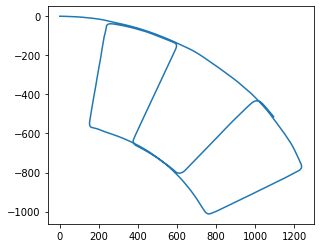

In [92]:
import math
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import time
from pr2_utils import read_data_from_csv
from pr2_utils import bresenham2D

def dead_reck():
    en_res = 4096
    dia_l = 0.623479
    dia_r = 0.622806
    
    file_enc = 'data/sensor_data/encoder.csv'
    time_enc, data_enc = read_data_from_csv(file_enc)
    file_fog = 'data/sensor_data/fog.csv'
    time_fog, data_fog = read_data_from_csv(file_fog)
    x = np.zeros((len(time_enc),3))
    index = 0
    theta = 0
    counter = 0
    for t in range(1,len(time_enc)):
#         del_t_enc = time_enc[t]-time_enc[t-1]
        x_left = math.pi*dia_l*(data_enc[t][0]-data_enc[t-1][0])/en_res
        x_right = math.pi*dia_r*(data_enc[t][1]-data_enc[t-1][1])/en_res
        x_mean = (x_left + x_right)/2
        
#         theta = 0
        # counter = 0
#         del_t_fog = time_fog[t+index]
        for counter in range(10):
            if time_fog[t+index+counter] >= time_enc[t]:
                break
            theta += data_fog[t+index+counter][2]  

        index += counter
#         del_t_fog = time_fog[t+index]-del_t_fog
        
        # print(theta)
        reading = np.array([x_mean*math.cos(theta),x_mean*math.sin(theta), theta])
        x[t]=x[t-1]+reading
    
    return x   
    
    
p= dead_reck()
# print(p[0:10])    

plt.plot(p[:,0],p[:,1])
plt.gca().set_aspect("equal")
plt.show()

In [69]:
R= np.array([[0.00130201, 0.796097 ,0.605167],[0.999999, -0.000419027, -0.00160026],[-0.00102038 ,0.605169 ,-0.796097 ]])
T: np.array([0.8349 , -0.0126869 , 1.76416])

time_lidar, lidar=read_data_from_csv("data/sensor_data/lidar.csv")
v_T_L= np.array([[1.30201e-03,  7.96097e-01,  6.05167e-01, 0.8349],[9.99999e-01, -4.19027e-04, -1.60026e-03, -0.0126869],[-1.02038e-03,  6.05169e-01, -7.96097e-01, 1.76416],[0,0,0,1]])
angles = np.linspace(-5, 185, 286) / 180 * np.pi
lidar2VehicleDict= {}
row1LHS=np.cos(angles)
row2LHS=np.sin(angles)



LHS=np.vstack((row1LHS,row2LHS))

bottomHalf= np.vstack((np.zeros(286), np.ones(286)))
for i in range(lidar.shape[0]):
    validIndices=(lidar[i,:]>=2)
    validLidar= lidar[i,validIndices]
    RHS=np.vstack((validLidar, validLidar))
    newLHS=LHS[:,validIndices]
    upperLidarMatrix=np.multiply(newLHS,RHS)
    lidarMatrix=np.vstack((upperLidarMatrix, bottomHalf[:,validIndices]))
    lidar2VehicleMatrix=v_T_L@lidarMatrix
    lidar2VehicleDict[str(i)]=lidar2VehicleMatrix



In [53]:
bottomHalf


# lidar2VehicleDict


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

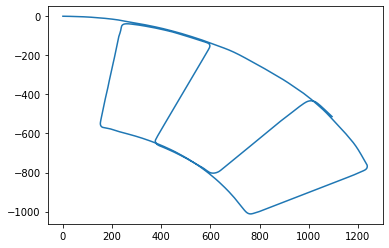

In [70]:
import numpy as np
from pr2_utils import *
import matplotlib.pyplot as plt

# Variables Definitions
left_Wheel_Dia          = 0.623479
right_Wheel_Dia         = 0.622806
enc_Resolution          = 4096

delta_yaw               = np.zeros(116048)
delta_distance          = np.zeros(116048)
X                       = np.zeros((116048, 3))
X[0]                    = np.array([0,0,0]) # Initializing the first element of X at 0
theta                   = 0 # General variable for angle
i                       = 0 # General counter

def initialize_Encoder():

    timestamp, data = read_data_from_csv('data/sensor_data/encoder.csv')

    return timestamp, data

def initialize_FOG():

    timestamp, data = read_data_from_csv('data/sensor_data/fog.csv')

    return timestamp, data


timestamp_encoder, data_encoder = initialize_Encoder()
timestamp_fog, data_fog = initialize_FOG()

for i in range( len(data_encoder) - 1 ):
    left_Wheel_Distance     = ( (data_encoder[i+1,0] - data_encoder[i,0]) * np.pi * left_Wheel_Dia )/ enc_Resolution
    right_Wheel_Distance    = ( (data_encoder[i+1,1] - data_encoder[i,1]) * np.pi * right_Wheel_Dia )/ enc_Resolution

    delta_distance[i]       = ( left_Wheel_Distance + right_Wheel_Distance ) / 2

for i in range( len(data_encoder) - 1 ):
    delta_yaw[i]    = sum( data_fog[ ((i - 1)*10 + 1) : (i*10 + 1), 2 ] )
    theta           = theta + delta_yaw[i]
    X[i+1]          = X[i] + np.array( [ delta_distance[i - 1] * np.cos(theta), delta_distance[i - 1] * np.sin(theta), theta ])
    i               = i + 1

plt.plot(X[:,0], X[:,1])
plt.show(block=True)





In [71]:
left_wheel_diam=0.623479
right_wheel_diam=0.622806
d=(left_wheel_diam+right_wheel_diam)/2

size x: 1401
size y: 1401


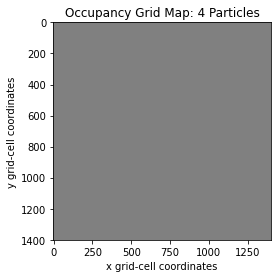

In [72]:
MAP = {}
MAP['res']   = 1 #meters
MAP['xmin']  = -100  #meters
MAP['ymin']  = -1200
MAP['xmax']  =  1300
MAP['ymax']  =  200
MAP['sizex']  = int(np.ceil((MAP['xmax'] - MAP['xmin']) / MAP['res'] + 1)) #cells
MAP['sizey']  = int(np.ceil((MAP['ymax'] - MAP['ymin']) / MAP['res'] + 1))
print("size x:", MAP['sizex'])
print("size y:", MAP['sizey'])
MAP['map'] = 128*np.ones((MAP['sizex'],MAP['sizey'],3), dtype=np.int32) #DATA TYPE: char or int8
plt.title("Occupancy Grid Map: 4 Particles")
plt.xlabel("x grid-cell coordinates")
plt.ylabel("y grid-cell coordinates")

x_im = np.arange(MAP['xmin'],MAP['xmax']+MAP['res'],MAP['res']) #x-positions of each pixel of the map
y_im = np.arange(MAP['ymin'],MAP['ymax']+MAP['res'],MAP['res']) #y-positions of each pixel of the map

x_range = np.arange(-0.4,0.4+0.1,0.1)
y_range = np.arange(-0.4,0.4+0.1,0.1)


plt.imshow(MAP['map'])
plt.pause(0.01)
plt.show()
trajectory=np.array([np.zeros(2)])

In [73]:
numParticles=4
alphas=np.ones(numParticles)/numParticles
print(alphas)
u=np.zeros([3,numParticles])
grid_side_size=1401

[0.25 0.25 0.25 0.25]


In [74]:
lambda_t=np.zeros((grid_side_size,grid_side_size))
m=np.zeros((grid_side_size,grid_side_size))
m[(lambda_t<=0)] = 0
m[(lambda_t>0)] = 1
absoluteRange=15*np.log(4)

In [75]:
mean=np.array([0,0])

In [86]:
def predict(timeStep): #input is timestep, i>1, respect the pipeline of always indexing i, not i-1

    
    # theta_t = 0
    tau= (time_lidar[timeStep]-time_lidar[timeStep-1])*(1e-9)
    v_t= np.pi*(d)*((data_encoder[timeStep,0]+data_encoder[timeStep,1])/2)/(4096*tau)

    linear_velocity= v_t #standard
    theta_t=timestamp_fog[timeStep]
    theta_t = theta_t + delta_yaw[timeStep]
    for i in range (numParticles):
     
        # noisy_angular= theta_t+np.random.normal(0, np.abs(theta_t/50))
        noisy_angular= theta_t
        u[2,i]= u[2,i]+noisy_angular
        # noise_linear=  linear_velocity + np.random.normal(0, np.abs(linear_velocity/200))
        noise_linear=  linear_velocity
        differential=np.array([noise_linear*np.cos(u[2,i]), noise_linear*np.sin(u[2,i])])
        differential=np.hstack((differential, np.zeros(1)))
        u[:,i]=u[:,i]+tau*differential
        
       # print("tau:" ,tau, ",v_t:", v_t, "yaw:", theta_t, "position", "=", u[[0,1],i])

In [87]:
def filter(matrix):
    xs0= matrix[0,:]
    ys0= matrix[1,:]
    xis = np.ceil((xs0 - MAP['xmin']) / MAP['res'] ).astype(np.int32)-1
    yis = np.ceil((ys0 - MAP['ymin']) / MAP['res'] ).astype(np.int32)-1

    # build an arbitrary map 
    indGood = np.logical_and(np.logical_and(np.logical_and((xis > 1), (yis > 1)), (xis < MAP['sizex'])), (yis < MAP['sizey']))
    return np.vstack((xis,yis))

In [88]:
def mapping_and_logOdds(bestGridPosition, bestGridLidar):
    global lambda_t
    for j in range(bestGridLidar.shape[1]):
        bresOutput=bresenham2D(bestGridPosition[0],bestGridPosition[1],bestGridLidar[0,j],bestGridLidar[1,j]).astype(np.int32)
        numColumns=bresOutput.shape[1]
        MAP['map'][bresOutput[0,:],bresOutput[1,:],:] = np.array([255,255,255])
        MAP['map'][bresOutput[0,-1],bresOutput[1,-1],:] = np.array([0,0,0])
        lambda_t[bresOutput[0,np.arange(numColumns-2)],bresOutput[1,np.arange(numColumns-2)]]= lambda_t[bresOutput[0,np.arange(numColumns-2)],bresOutput[1,np.arange(numColumns-2)]]-np.log(4)
        lambda_t[bresOutput[0,-1],bresOutput[1,-1]]= lambda_t[bresOutput[0,-1],bresOutput[1,-1]]+np.log(4)

In [89]:
def update_and_mapping(timeStep):
    global m
    global lambda_t
    global trajectory
    global world_particles

    ph=np.zeros(numParticles)
    correlationArray=np.zeros(numParticles)
    
    # World to FOG pose transformation matrix
    W_T_S= np.block([
    [np.eye(3),               np.array([0.335,0.035, -0.78]).reshape(3,1)],
    [np.zeros((1, 3)), 1               ]
    ])
        
    for i in range(numParticles):
        cumulativeYaw_t=u[2,i] #after selecting particle, get its R and P
        R=np.array([[np.cos(cumulativeYaw_t), -np.sin(cumulativeYaw_t),0 ],[np.sin(cumulativeYaw_t), np.cos(cumulativeYaw_t),0 ],[0,0,1]])
        P= np.array([u[0,i],u[1,i],0]).reshape(3,1)

        S_T_V= np.block([
        [R,               P],
        [np.zeros((1, 3)), 1               ]
        ])

        worldLidarMatrix_i=W_T_S@S_T_V@lidar2VehicleDict[str(timeStep+1)]    
        c=mapCorrelation(m,x_im,y_im,worldLidarMatrix_i[[0,1],:],x_range,y_range)
        correlationArray[i] = np.max(c) #max correlation of particle i

    ph= softmax((correlationArray-np.max(correlationArray))) #softmax all correlations


    #determine alphas
    particlesWeightsBuffer=np.zeros(numParticles)
    for i in range(numParticles):
        particlesWeightsBuffer[i]=alphas[i]*ph[i]
    
    for i in range(numParticles):
        alphas[i]= particlesWeightsBuffer[i]/np.sum(particlesWeightsBuffer)
        
    highestParticleIndex= np.argmax(alphas)    
    nextPosition=np.array([[u[0,highestParticleIndex],u[1,highestParticleIndex]]])
    trajectory=np.concatenate((trajectory,nextPosition), axis=0)
    
    #project scan from best particle
    cumulativeYaw_t=u[2,highestParticleIndex] #after selecting particle, get its R and P
    R=np.array([[np.cos(cumulativeYaw_t), -np.sin(cumulativeYaw_t),0 ],[np.sin(cumulativeYaw_t), np.cos(cumulativeYaw_t),0 ],[0,0,1]])
    P= np.array([u[0,highestParticleIndex],u[1,highestParticleIndex],0]).reshape(3,1)

    S_T_V= np.block([
    [R,               P],
    [np.zeros((1, 3)), 1]
    ])
        
    worldLidarMatrix=W_T_S@S_T_V@lidar2VehicleDict[str(timeStep+1)]
    initial_point_x= np.ceil((u[0,highestParticleIndex] - MAP['xmin']) / MAP['res'] ).astype(np.int32)-1
    initial_point_y = np.ceil((u[1,highestParticleIndex] - MAP['ymin']) / MAP['res'] ).astype(np.int32)-1
    cells_worldLidarMatrix=filter(worldLidarMatrix)

    #update map and log odds
    mapping_and_logOdds(np.array([initial_point_x,initial_point_y]), cells_worldLidarMatrix) # feed in list that corresponds to be particle
    
    #binarize lambda
    m[(lambda_t>0)] = 1
    m[(lambda_t<=0)] = 0
    
    #cap lambda
    lambda_t[(lambda_t>=absoluteRange)] = absoluteRange
    lambda_t[(lambda_t<=-absoluteRange)] = -absoluteRange
    
    #n_threshold and n_eff
    n_eff=1/np.linalg.norm(alphas)**2

    #threshold depending on number of particles, change depending on situation
    # if(n_eff<0.4*numParticles):
    #     print("resampled at iteration:", timeStep)
    #     resample()


In [90]:
for i in range(1,115865):
    predict(i)
    
    if(i%10==0):
        update_and_mapping(i)
        
    # if(i%50000==0): #display map, no map correlation needed
    #     cell_trajectory= filter(np.transpose(trajectory))
    #     MAP['map'][cell_trajectory[0,:],cell_trajectory[1,:]] = np.array([255,0,0])
    #     plt.imshow(MAP['map'])
    #     plt.pause(0.01)
    #     print("Slam Output at Iteration:", i)
    #     plt.show()
        
cell_trajectory= filter(np.transpose(trajectory))
MAP['map'][cell_trajectory[0,:],cell_trajectory[1,:]] = np.array([255,0,0])
plt.imshow(MAP['map'])
plt.pause(0.01)
print("iter", i)
plt.show()

IndexError: index 1401 is out of bounds for axis 1 with size 1401